# MACHINE LEARNING

In [1]:
#Importing Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from functools import reduce
from sklearn.cluster import KMeans

In [2]:
#Reading all Cleaned DataSets
us_emi_df = pd.read_csv('MergedTables/gdp_pop_sector_emissions.csv').iloc[: , 1:]
gdp_emi = pd.read_csv('MergedTables/gdp_emissions.csv').iloc[: , 1:]
pop_emi = pd.read_csv('MergedTables/pop_emissions.csv').iloc[: , 1:]
sec_avg = pd.read_csv('MergedTables/sector_averages.csv')
year_avg = pd.read_csv('MergedTables/year_averages.csv')

display(sec_avg)
display(year_avg)

,Sector,Year,Average GHG
0,Industrial Processes,1997,10.152633
1,Industry,1997,46.443220
2,Energy,1997,229.169982
3,Land-Use Change and Forestry,1997,-33.814918
4,Fugitive Emissions,1997,7.821604
...,...,...,...
259,Transportation,2018,75.523671
260,Commercial,2018,9.873689
261,Industry,2018,40.732397
262,Industrial Processes,2018,12.315287


,Year,Avg Pop,Avg GDP,Avg GHG
0,1997,1.048642e+07,1.253442e+11,38.688012
1,1998,1.060977e+07,1.291124e+11,38.563114
2,1999,1.073231e+07,1.371581e+11,38.840315
3,2000,1.085240e+07,1.425640e+11,39.813510
4,2001,1.096034e+07,1.476914e+11,39.154352
5,2002,1.106251e+07,1.553975e+11,39.398693
6,2003,1.115800e+07,1.657713e+11,39.765280
7,2004,1.126174e+07,1.783628e+11,40.560330
8,2005,1.136602e+07,1.942259e+11,40.639830
9,2006,1.147615e+07,2.056584e+11,40.090236


# Linear Regression Model Test - Result - NO GOOD

In [5]:
# #Linear Regression Model for Residential Sector in the State of Alabama
# us_ghg = us_emi_df[['State', 'Sector','Year', 'All GHG']].loc[us_emi_df['State'] == 'AL']
# y = us_ghg.loc[us_ghg['Sector'] == 'Energy']['All GHG']
# X = us_ghg.loc[us_ghg['Sector']=='Energy'].Year.values.reshape(-1,1)

# # # # Create a model with scikit-learn
# model = LinearRegression()

# # By convention, X is capitalized and y is lowercase
# model.fit(X, y)

# # The model creates predicted y values based on X values
# y_pred = model.predict(X)

# # Plot the results. The best fit line is red.
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [6]:
#Drop non-necessary columns due to lack of information or too many 0's that will confuse ML model
us_emi_df = us_emi_df.drop(columns=['CH4', 'CO2', 'N2O', 'F-Gas']).loc[(us_emi_df['State'] != 'USA')]
gdp_emi = gdp_emi.drop(columns=['CH4', 'CO2', 'N2O', 'F-Gas'])
pop_emi = pop_emi.drop(columns=['CH4', 'CO2', 'N2O', 'F-Gas'])

In [7]:
#Display updated DFs
display(us_emi_df)
display(gdp_emi)
display(pop_emi)

,State,Year,GDP,Population,Sector,All GHG
0,AL,1997,37247871000,4367935,Agriculture,6.889241
1,AL,1998,39368055000,4404701,Agriculture,6.954451
2,AL,1999,41513658000,4430141,Agriculture,6.560038
3,AL,2000,42583368000,4452173,Agriculture,6.298967
4,AL,2001,43348584000,4467634,Agriculture,6.374233
...,...,...,...,...,...,...
13723,WY,2014,18271502000,583159,Waste,0.449731
13724,WY,2015,16516120000,586389,Waste,0.456765
13725,WY,2016,15164898000,585243,Waste,0.463380
13726,WY,2017,15976363000,579994,Waste,0.469695


,StateFull,State,Year,GDP,All GHG
0,United States,USA,1997,3286530000000,12070.659621
1,United States,USA,1998,3384010000000,12031.691439
2,United States,USA,1999,3592860000000,12118.178347
3,United States,USA,2000,3733600000000,12421.815038
4,United States,USA,2001,3866600000000,12216.157934
...,...,...,...,...,...
1139,Wyoming,WY,2014,18271502000,210.555235
1140,Wyoming,WY,2015,16516120000,180.691787
1141,Wyoming,WY,2016,15164898000,162.389203
1142,Wyoming,WY,2017,15976363000,198.608349


,State,Year,Population,All GHG
0,AL,1997,4367935,254.141698
1,AL,1998,4404701,250.081408
2,AL,1999,4430141,253.152871
3,AL,2000,4452173,264.369897
4,AL,2001,4467634,244.859269
...,...,...,...,...
1139,USA,2014,318386329,11682.775747
1140,USA,2015,320738994,11377.890893
1141,USA,2016,323071755,11150.643685
1142,USA,2017,325122128,11124.331402


# Random Forest Classifier Test

In [8]:
X = year_avg[['Avg Pop','Avg GDP']]
y = year_avg['Avg GHG']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
clf = RandomForestRegressor(random_state=1, n_estimators=100).fit(X_train, y_train)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9551185822792961
Testing Score: 0.6995537528819304


In [12]:
X_tot = us_emi_df[['Population','GDP']]
y_tot = us_emi_df['All GHG']

print(f'Testing Score: {clf.score(X_tot, y_tot)}')

Testing Score: -0.1392501470615517


c:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GDP
- Population
Feature names seen at fit time, yet now missing:
- Avg GDP
- Avg Pop

  warnings.warn(message, FutureWarning)


# K-Means

In [13]:
X = us_emi_df[['All GHG']]
y = us_emi_df['GDP']

# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)

X_scaled.sort()

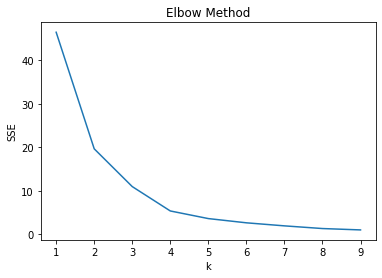

In [14]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [15]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [16]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = us_emi_df.join(df_y, how='inner')
combined

,State,Year,GDP,Population,Sector,All GHG,Cluster
0,AL,1997,37247871000,4367935,Agriculture,6.889241,1
1,AL,1998,39368055000,4404701,Agriculture,6.954451,1
2,AL,1999,41513658000,4430141,Agriculture,6.560038,1
3,AL,2000,42583368000,4452173,Agriculture,6.298967,1
4,AL,2001,43348584000,4467634,Agriculture,6.374233,1
...,...,...,...,...,...,...,...
13459,WI,2014,110769000000,5753199,Waste,1.646875,1
13460,WI,2015,116316000000,5762927,Waste,1.579835,1
13461,WI,2016,118370000000,5775170,Waste,1.517602,1
13462,WI,2017,115809000000,5793147,Waste,1.470443,1


In [1]:
#Scatter GDP vs GHG
plt.scatter(x=combined['GDP'], y= combined['All GHG'], c=combined['Cluster'])

NameError: name 'plt' is not defined

In [18]:
X = us_emi_df[['Population']]
y = us_emi_df['GDP']

# Scale the dataset using MinMaxScaler()
# X_scaled = MinMaxScaler().fit_transform(X)

# X_scaled.sort()

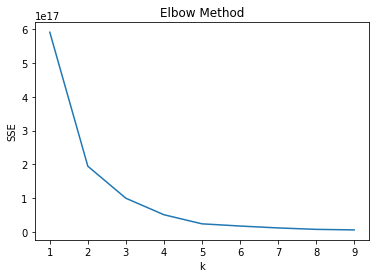

In [19]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [20]:
# Create a KMeans model with 4 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X)

# Calculate predicted values.
y_pred = model.predict(X)

In [21]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = us_emi_df.join(df_y, how='inner')
combined

,State,Year,GDP,Population,Sector,All GHG,Cluster
0,AL,1997,37247871000,4367935,Agriculture,6.889241,0
1,AL,1998,39368055000,4404701,Agriculture,6.954451,0
2,AL,1999,41513658000,4430141,Agriculture,6.560038,0
3,AL,2000,42583368000,4452173,Agriculture,6.298967,0
4,AL,2001,43348584000,4467634,Agriculture,6.374233,0
...,...,...,...,...,...,...,...
13459,WI,2014,110769000000,5753199,Waste,1.646875,0
13460,WI,2015,116316000000,5762927,Waste,1.579835,0
13461,WI,2016,118370000000,5775170,Waste,1.517602,0
13462,WI,2017,115809000000,5793147,Waste,1.470443,0


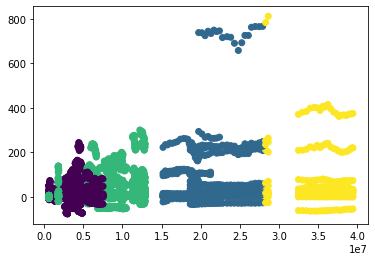

In [22]:
#Scatter Population vs GHG
plt.scatter(x=combined['Population'], y= combined['All GHG'], c=combined['Cluster'])